Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, We shall recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.DataFrame(pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",header=None))

df.head()

0                                                  1  \
0 NaN  Note: The data and information in this documen...   
1 NaN                                                NaN   
2 NaN                                                NaN   
3 NaN                                                NaN   
4 NaN                                                NaN   

                         2   3   4    5   6   7    8  
0                      NaN NaN NaN  NaN NaN NaN  NaN  
1                      NaN NaN NaN  NaN NaN NaN  NaN  
2                      NaN NaN NaN  NaN NaN NaN  NaN  
3                      NaN NaN NaN  NaN NaN NaN  NaN  
4  KPMG Virtual Internship NaN NaN  NaN NaN NaN  NaN

In [3]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions") 
customer_demodraphic =pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")
customer_address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress")


In [4]:
print(customer_demodraphic.columns.tolist())

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']


In [5]:
print(customer_address.columns.tolist())

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']


In [6]:
df1 = pd.concat([customer_demodraphic,customer_address ], axis=1)
df1.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1 Unnamed: 2 Unnamed: 3                           Unnamed: 4  \
0  first_name  last_name     gender  past_3_years_bike_related_purchases   
1     Laraine  Medendorp          F                                   93   
2         Eli    Bockman       Male                                   81   
3       Arlin     Dearle       Male                                   61   
4      Talbot        NaN       Male                                   33   

            Unnamed: 5              Unnamed: 6             Unnamed: 7  \
0                  DOB               job_title  job_industry_category   
1  1953-10-12 00:00:00     Executive Secretary                 Health   
2  1980-12-16 00:00:00  Administrative Officer     Financial Services   
3  1954-01-20 00:00:00      Recruiting Manager               Property   
4  1961-10-03 00:00:00                     NaN                     IT   

       Unnamed: 8          Unnamed: 9  \
0  wealth_segment  deceased_indicator   
1   Mass Customer                   N   
2   Mass Customer                   N   
3   Mass Customer                   N   
4   Mass Customer                   N   

                                         Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0                                            default    owns_car      tenure   
1                                                 "'         Yes          11   
2                       <script>alert('hi')</script>         Yes          16   
3                                2018-02-01 00:00:00         Yes          15   
4  () { _; } >_[$($())] { touch /tmp/blns.shellsh...          No           7   

  Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  4                                                                                                                              
4                                                  5                                                                                                                              

            Unnamed: 1 Unnamed: 2       Unnamed: 3 Unnamed: 4  \
0              address   postcode            state    country   
1   060 Morning Avenue       2016  New South Wales  Australia   
2  6 Meadow Vale Court       2153

In [7]:
df1 = pd.merge(customer_demodraphic,customer_address, left_index=True, right_index=True)
 
# display dataframe
df1.head(5)

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. _x  \
0                                        customer_id                                                                                                                                
1                                                  1                                                                                                                                
2                                                  2                                                                                                                                
3                                                  3                                                                                                                                
4                                                  4                                                                                                                                

  Unnamed: 1_x Unnamed: 2_x Unnamed: 3_x                         Unnamed: 4_x  \
0   first_name    last_name       gender  past_3_years_bike_related_purchases   
1      Laraine    Medendorp            F                                   93   
2          Eli      Bockman         Male                                   81   
3        Arlin       Dearle         Male                                   61   
4       Talbot          NaN         Male                                   33   

          Unnamed: 5_x              Unnamed: 6             Unnamed: 7  \
0                  DOB               job_title  job_industry_category   
1  1953-10-12 00:00:00     Executive Secretary                 Health   
2  1980-12-16 00:00:00  Administrative Officer     Financial Services   
3  1954-01-20 00:00:00      Recruiting Manager               Property   
4  1961-10-03 00:00:00                     NaN                     IT   

       Unnamed: 8          Unnamed: 9  \
0  wealth_segment  deceased_indicator   
1   Mass Customer                   N   
2   Mass Customer                   N   
3   Mass Customer                   N   
4   Mass Customer                   N   

                                         Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0                                            default    owns_car      tenure   
1                                                 "'         Yes          11   
2                       <script>alert('hi')</script>         Yes          16   
3                                2018-02-01 00:00:00         Yes          15   
4  () { _; } >_[$($())] { touch /tmp/blns.shellsh...          No           7   

  Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. _y  \
0                                        customer_id                                                                                                                                
1                                                  1                                                                                                                                
2                                                  2                                                                                                                                
3                                                  4                                                                                                                                
4                                                  5                                                                                                                                

          Unnamed: 1_y Unnamed: 2_y     Unnamed: 3_y Unnamed: 4_y  \
0              address     postcode            state      country   
1   060 Morning Avenue         2016 

In [8]:
transactions.columns = transactions.iloc[0]
transaction1 = transactions[1:]
transaction1.head()

0 transaction_id product_id customer_id     transaction_date online_order  \
1              1          2        2950  2017-02-25 00:00:00        False   
2              2          3        3120  2017-05-21 00:00:00         True   
3              3         37         402  2017-10-16 00:00:00        False   
4              4         88        3135  2017-08-31 00:00:00        False   
5              5         78         787  2017-10-01 00:00:00         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0 list_price standard_cost product_first_sold_date  
1      71.49         53.62                   41245  
2    2091.47        388.92                   41701  
3    1793.43        248.82                   36361  
4    1198.46         381.1                   36145  
5     1765.3        709.48                   42226

In [9]:
df1.columns = df1.iloc[0]
df2 = df1[1:]
df2.head()

0 customer_id      first_name  last_name  gender  \
1           1         Laraine  Medendorp       F   
2           2             Eli    Bockman    Male   
3           3           Arlin     Dearle    Male   
4           4          Talbot        NaN    Male   
5           5  Sheila-kathryn     Calton  Female   

0 past_3_years_bike_related_purchases                  DOB  \
1                                  93  1953-10-12 00:00:00   
2                                  81  1980-12-16 00:00:00   
3                                  61  1954-01-20 00:00:00   
4                                  33  1961-10-03 00:00:00   
5                                  56  1977-05-13 00:00:00   

0               job_title job_industry_category     wealth_segment  \
1     Executive Secretary                Health      Mass Customer   
2  Administrative Officer    Financial Services      Mass Customer   
3      Recruiting Manager              Property      Mass Customer   
4                     NaN                    IT      Mass Customer   
5           Senior Editor                   NaN  Affluent Customer   

0 deceased_indicator                                            default  \
1                  N                                                 "'   
2                  N                       <script>alert('hi')</script>   
3                  N                                2018-02-01 00:00:00   
4                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
5                  N                                                NIL   

0 owns_car tenure customer_id              address postcode            state  \
1      Yes     11           1   060 Morning Avenue     2016  New South Wales   
2      Yes     16           2  6 Meadow Vale Court     2153  New South Wales   
3      Yes     15           4   0 Holy Cross Court     4211              QLD   
4       No      7           5  17979 Del Mar Point     2448  New South Wales   
5      Yes      8           6     9 Oakridge Court     3216              VIC   

0    country property_valuation  
1  Australia                 10  
2  Australia                 10  
3  Australia                  9  
4  Australia                  4  
5  Australia                  9

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 3999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3999 non-null   object
 1   first_name                           3999 non-null   object
 2   last_name                            3874 non-null   object
 3   gender                               3999 non-null   object
 4   past_3_years_bike_related_purchases  3999 non-null   object
 5   DOB                                  3912 non-null   object
 6   job_title                            3493 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       3999 non-null   object
 9   deceased_indicator                   3999 non-null   object
 10  default                              3697 non-null   object
 11  owns_car                             3999 n

In [11]:
df2.duplicated().sum()

0

In [12]:
df2.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
customer_id                              0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [13]:
df2.dropna(axis=0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13200\1112361839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,inplace=True)


In [14]:
df2.isnull().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

In [15]:
df2.drop(['default'], axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13200\3249473553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['default'], axis=1, inplace=True)


In [16]:
df2.isnull().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

In [17]:
df2.dtypes

0
customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                 object
customer_id                            object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
dtype: object

In [18]:
df2['past_3_years_bike_related_purchases'] = df2['past_3_years_bike_related_purchases'].astype('int')
df2['tenure'] = df2['tenure'].astype('int')
df2['property_valuation'] = df2['property_valuation'].astype('int') 

C:\Users\User\AppData\Local\Temp\ipykernel_13200\3132514199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['past_3_years_bike_related_purchases'] = df2['past_3_years_bike_related_purchases'].astype('int')
C:\Users\User\AppData\Local\Temp\ipykernel_13200\3132514199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tenure'] = df2['tenure'].astype('int')
C:\Users\User\AppData\Local\Temp\ipykernel_13200\3132514199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [19]:
df2["DOB"] = df2["DOB"].astype('datetime64[ns]')

C:\Users\User\AppData\Local\Temp\ipykernel_13200\1384627071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["DOB"] = df2["DOB"].astype('datetime64[ns]')


In [20]:
df2.dtypes

0
customer_id                                    object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int32
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int32
customer_id                                    object
address                                        object
postcode                                       object
state                                          object
country                                        object
property_valuation                              int32
dtype: object

In [21]:
df2['gender'].value_counts()

Female    1366
Male      1262
F            1
Femal        1
Name: gender, dtype: int64

In [22]:
df4 = df2.replace({'gender' : {'F' : 'Female', 'Femal' : 'Female'}})

In [23]:
count1=df4['gender'].value_counts()
count1

Female    1368
Male      1262
Name: gender, dtype: int64

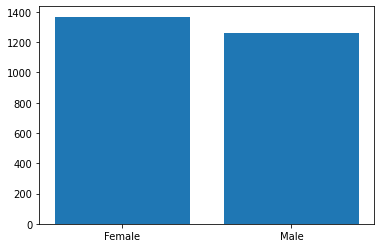

In [24]:
#plot to see which location has the most purchases
plt.bar(count1.index, count1.values)
plt.show()

There are more female identifying people as customers then males.

In [25]:
count2=df2['job_industry_category'].value_counts()
count2

Manufacturing         635
Financial Services    626
Health                496
Retail                278
Property              222
IT                    119
Entertainment         110
Argiculture            91
Telecommunications     53
Name: job_industry_category, dtype: int64

Text(0.5, 1.0, 'Count plot for the condition of the')

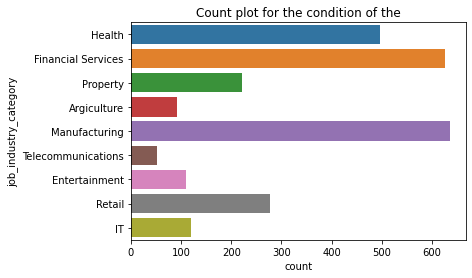

In [76]:
# countplot for drive
ax = sns.countplot(
                   y="job_industry_category", 
                   data=df2) 
# Set title
plt.title("Count plot for the condition of the")

Manufacturing and financial services have the most people purchasing products followed by health

In [27]:
df2['job_title'].value_counts()

Social Worker                   38
Sales Representative            36
Chemical Engineer               34
Dental Hygienist                34
Registered Nurse                33
                                ..
Database Administrator I         2
Human Resources Assistant IV     2
Research Assistant III           2
Database Administrator II        1
Developer I                      1
Name: job_title, Length: 195, dtype: int64

In [28]:
count3=df2['state'].value_counts()
count3

NSW                1363
VIC                 615
QLD                 530
New South Wales      63
Victoria             59
Name: state, dtype: int64

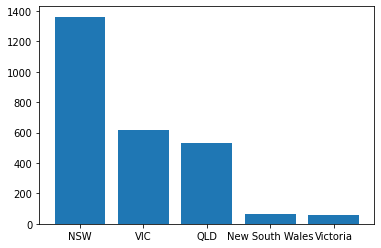

In [29]:
#plot to see which location has the most purchases
plt.bar(count3.index, count3.values)
plt.show()

Most of the customers come from NSW followedby VIC AND QLD.

In [30]:
count4=df2['wealth_segment'].value_counts()
count4

Mass Customer        1300
High Net Worth        674
Affluent Customer     656
Name: wealth_segment, dtype: int64

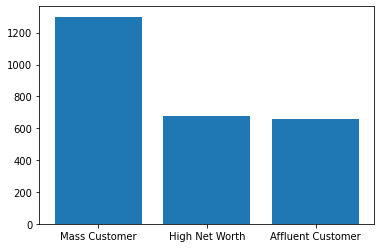

In [31]:
#plot to see which location has the most purchases
plt.bar(count4.index, count4.values)
plt.show()

Most of the existing customers come from the Mass customer

In [32]:
transaction1.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [33]:
transaction1.dropna(axis=0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13200\3427931581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction1.dropna(axis=0,inplace=True)


In [34]:
transaction1.isnull().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [35]:
transaction1.dtypes

0
transaction_id             object
product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

In [36]:
transaction1['list_price'] = transaction1['list_price'].astype('int')
transaction1['standard_cost'] = transaction1['standard_cost'].astype('int') 

C:\Users\User\AppData\Local\Temp\ipykernel_13200\850040602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction1['list_price'] = transaction1['list_price'].astype('int')
C:\Users\User\AppData\Local\Temp\ipykernel_13200\850040602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction1['standard_cost'] = transaction1['standard_cost'].astype('int')


In [37]:
transaction1["transaction_date"] = transaction1["transaction_date"].astype('datetime64[ns]')

C:\Users\User\AppData\Local\Temp\ipykernel_13200\1948689102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction1["transaction_date"] = transaction1["transaction_date"].astype('datetime64[ns]')


In [38]:
transaction1.dtypes

0
transaction_id                     object
product_id                         object
customer_id                        object
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                          int32
standard_cost                       int32
product_first_sold_date            object
dtype: object

In [39]:
count5=transaction1['online_order'].value_counts()
count5

True     9739
False    9706
Name: online_order, dtype: int64

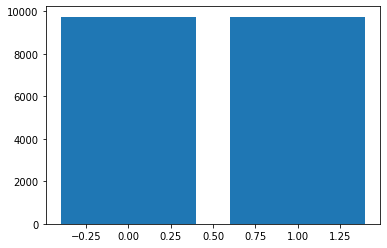

In [40]:
#plot to see which location has the most purchases
plt.bar(count5.index, count5.values)
plt.show()

The number of customers buying online and offline are around the same

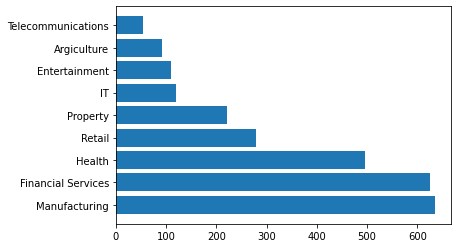

In [81]:
#plot to see which has the most purchases
plt.barh(count2.index, count2.values)
plt.show()

In [42]:
count6=transaction1['order_status'].value_counts()
count6

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

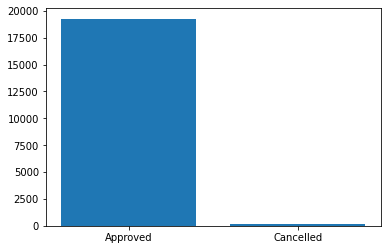

In [43]:
#plot to see which location has the most purchases
plt.bar(count6.index, count6.values)
plt.show()

Many orders are approved than rejected

In [44]:
count7=transaction1['brand'].value_counts()
count7

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

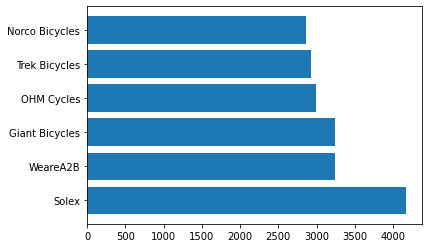

In [80]:
#plot to see which location has the most purchases
plt.barh(count7.index, count7.values)
plt.show()

Solex,WeareA2B,Giant Bicycles are the most in demand brands

In [46]:
count8=transaction1['product_line'].value_counts()
count8

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

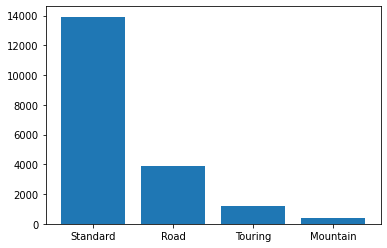

In [47]:
#plot to see which location has the most purchases
plt.bar(count8.index, count8.values)
plt.show()

the most popular product is standard

In [48]:
count9=transaction1['product_class'].value_counts()
count9

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

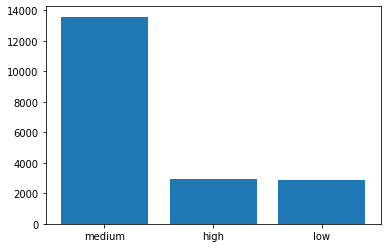

In [49]:
#plot to see which location has the most purchases
plt.bar(count9.index, count9.values)
plt.show()

Medium is the most popular product class

In [50]:
count10=transaction1['product_size'].value_counts()
count10

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

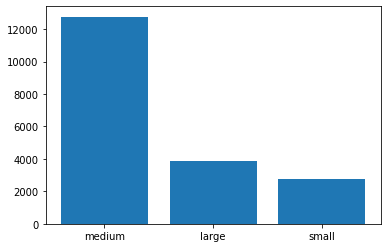

In [51]:
#plot to see which location has the most purchases
plt.bar(count10.index, count10.values)
plt.show()

In [52]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 1 to 3997
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   object        
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int32         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  owns_car    

Text(0.5, 1.0, '')

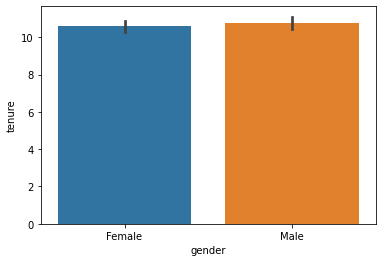

In [53]:
# plotting top models against price 
ax = sns.barplot(x="gender",y="tenure",data=df4) 
# Set title 
plt.title("") 

Male identifying people have the most tenure

Text(0.5, 1.0, '')

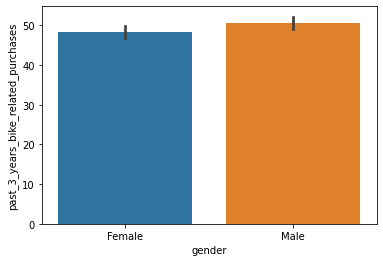

In [54]:
# plotting top models against price 
ax = sns.barplot(x="gender",y="past_3_years_bike_related_purchases",data=df4) 
# Set title 
plt.title("") 

more male identifying people purchase bike related stuff after 3 years

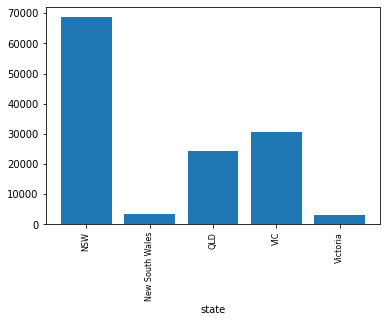

In [56]:
keys = [city for city, df in df4.groupby(['state'])]

plt.bar(keys,df4.groupby(['state']).sum()['past_3_years_bike_related_purchases'])
plt.ylabel('')
plt.xlabel('state')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

more people in NSW purchase bike related products after 3 years.

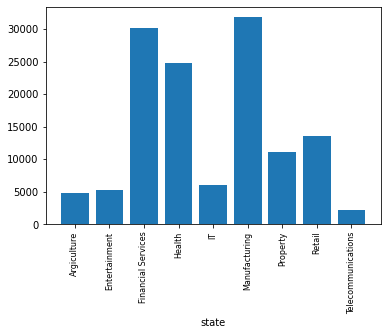

In [57]:
keys = [city for city, df in df4.groupby(['job_industry_category'])]

plt.bar(keys,df4.groupby(['job_industry_category']).sum()['past_3_years_bike_related_purchases'])
plt.ylabel('')
plt.xlabel('state')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

More people in finance,health and manufacturing purchase bike porducts after 3 years

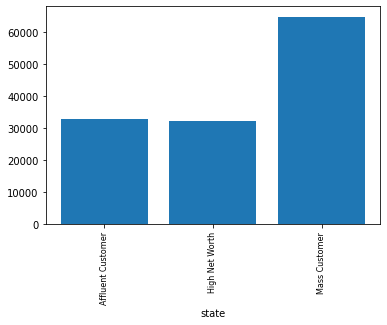

In [58]:
keys = [city for city, df in df4.groupby(['wealth_segment'])]

plt.bar(keys,df4.groupby(['wealth_segment']).sum()['past_3_years_bike_related_purchases'])
plt.ylabel('')
plt.xlabel('state')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Mass customers ppurchase bike related products after 3 years

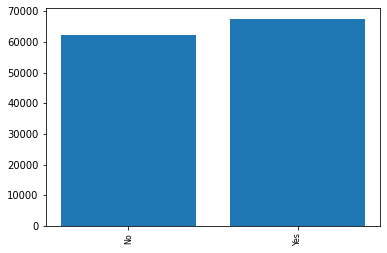

In [59]:
keys = [city for city, df in df4.groupby(['owns_car'])]

plt.bar(keys,df4.groupby(['owns_car']).sum()['past_3_years_bike_related_purchases'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Interestingly car owners purchase bike related stuff after 3 years

In [60]:
df4["gender"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2630 entries, 1 to 3997
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
2630 non-null   object
dtypes: object(1)
memory usage: 41.1+ KB


In [61]:
# converting the columns that are supposed to be categories that we're going to use
df4["gender"] = df4["gender"].astype('category')
df4["owns_car"] = df4["owns_car"].astype('category')
df4["job_industry_category"] = df4["job_industry_category"].astype('category')
df4["wealth_segment"] = df4["wealth_segment"].astype('category')

In [62]:
# encoding the categorical data
df4["gender"] = df4["gender"].cat.codes
df4["owns_car"] = df4["owns_car"].cat.codes
df4["job_industry_category"] = df4["job_industry_category"].cat.codes
df4["wealth_segment"] = df4["wealth_segment"].cat.codes
df4.head()

0  customer_id first_name  last_name  gender  \
1            1    Laraine  Medendorp       0   
2            2        Eli    Bockman       1   
3            3      Arlin     Dearle       1   
9            9       Mala       Lind       0   
10          10   Fiorenze    Birdall       0   

0   past_3_years_bike_related_purchases        DOB  \
1                                    93 1953-10-12   
2                                    81 1980-12-16   
3                                    61 1954-01-20   
9                                    97 1973-03-10   
10                                   49 1988-10-11   

0                              job_title  job_industry_category  \
1                    Executive Secretary                      3   
2                 Administrative Officer                      2   
3                     Recruiting Manager                      6   
9   Business Systems Development Analyst                      0   
10               Senior Quality Engineer                      2   

0   wealth_segment deceased_indicator  owns_car  tenure customer_id  \
1                2                  N         1      11           1   
2                2                  N         1      16           2   
3                2                  N         1      15           4   
9                0                  N         1       8          11   
10               2                  N         1      20          12   

0                   address postcode            state    country  \
1        060 Morning Avenue     2016  New South Wales  Australia   
2       6 Meadow Vale Court     2153  New South Wales  Australia   
3        0 Holy Cross Court     4211              QLD  Australia   
9      93405 Ludington Park     3044              VIC  Australia   
10  44339 Golden Leaf Alley     4557              QLD  Australia   

0   property_valuation  
1                   10  
2                   10  
3                    9  
9                    8  
10                   4

In [63]:
drop_column = ['first_name','last_name','DOB','job_title','address','postcode','state','country','deceased_indicator']
df4 = df4.drop(columns=drop_column)
df4.head()

0  customer_id  gender  past_3_years_bike_related_purchases  \
1            1       0                                   93   
2            2       1                                   81   
3            3       1                                   61   
9            9       0                                   97   
10          10       0                                   49   

0   job_industry_category  wealth_segment  owns_car  tenure customer_id  \
1                       3               2         1      11           1   
2                       2               2         1      16           2   
3                       6               2         1      15           4   
9                       0               0         1       8          11   
10                      2               2         1      20          12   

0   property_valuation  
1                   10  
2                   10  
3                    9  
9                    8  
10                   4

In [85]:
# import packages for the machine learning model
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [86]:
#create feature set and labels
X = df4.drop(['gender','customer_id'],axis=1)
y = df4.gender
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.75
Accuracy of XGB classifier on test set: 0.49


this method achieved 75% accuracy

In [87]:
# check the classification model to see where exactly our model fails.
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        75
           1       0.42      0.46      0.44        57

    accuracy                           0.49       132
   macro avg       0.49      0.49      0.49       132
weighted avg       0.50      0.49      0.49       132



since we had a small dataset the precision wasnt good

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

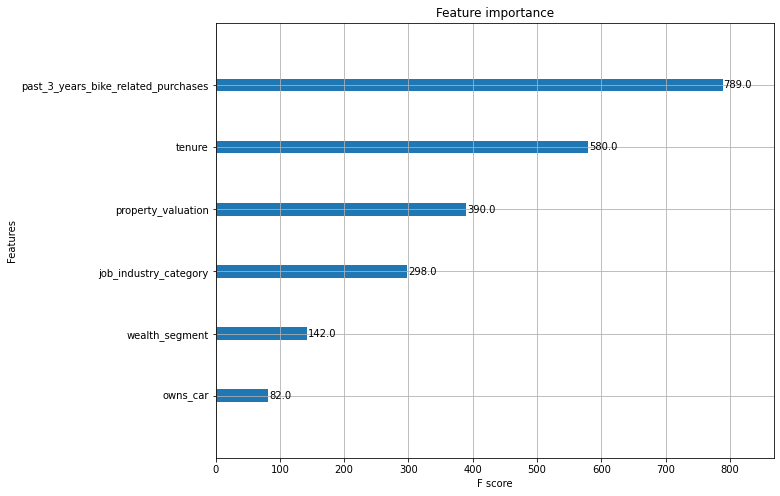

In [88]:
# check which features were used by the model
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

focus was given to bikes and tenure

In [95]:
transaction1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 1 to 20000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     19445 non-null  object
 1   online_order   19445 non-null  int8  
 2   brand          19445 non-null  int8  
 3   product_class  19445 non-null  int8  
 4   product_size   19445 non-null  int8  
 5   list_price     19445 non-null  int32 
 6   standard_cost  19445 non-null  int32 
dtypes: int32(2), int8(4), object(1)
memory usage: 531.7+ KB


In [96]:
# converting the columns that are supposed to be categories that we're going to use
transaction1["online_order"] = transaction1["online_order"].astype('category')
transaction1["brand"] = transaction1["brand"].astype('category')
transaction1["product_class"] = transaction1["product_class"].astype('category')
transaction1["product_size"] = transaction1["product_size"].astype('category')

In [97]:
# encoding the categorical data
transaction1["online_order"] = transaction1["online_order"].cat.codes
transaction1["brand"] = transaction1["brand"].cat.codes
transaction1["product_class"] = transaction1["product_class"].cat.codes
transaction1["product_size"] = transaction1["product_size"].cat.codes
transaction1.head()

0 product_id  online_order  brand  product_class  product_size  list_price  \
1          2             0      3              2             1          71   
2          3             1      4              2             0        2091   
3         37             0      2              1             1        1793   
4         88             0      1              2             1        1198   
5         78             1      0              2             0        1765   

0  standard_cost  
1             53  
2            388  
3            248  
4            381  
5            709

In [99]:
drop_column1 = ['transaction_id','customer_id','transaction_date','order_status','product_line','product_first_sold_date']
transaction1 = transaction1.drop(columns=drop_column1)
transaction1.head()

KeyError: "['transaction_id', 'customer_id', 'transaction_date', 'order_status', 'product_line', 'product_first_sold_date'] not found in axis"

In [100]:
# import packages for the machine learning model
import sklearn
import xgboost as xgb

In [101]:
from sklearn.model_selection import train_test_split
#create feature set and labels
X = transaction1.drop(['online_order','product_id'],axis=1)
y = transaction1.online_order
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.53
Accuracy of XGB classifier on test set: 0.48


model wasnt accurate due to small dataset

In [104]:
#check the classification model to see where exactly our model fails.
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       470
           1       0.50      0.41      0.45       503

    accuracy                           0.48       973
   macro avg       0.48      0.48      0.48       973
weighted avg       0.48      0.48      0.48       973



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

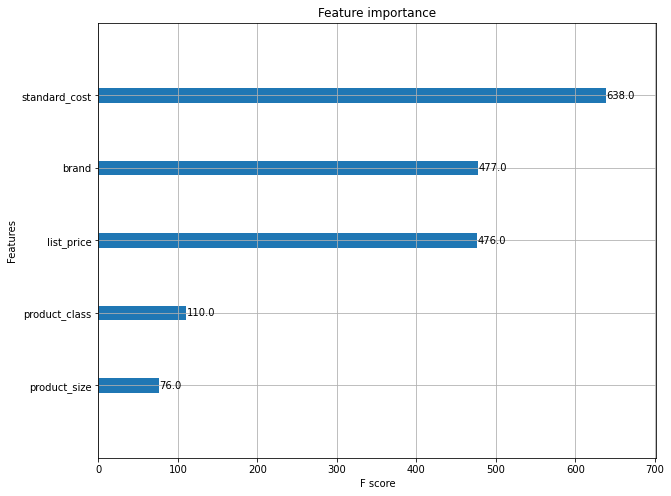

In [105]:
# check which features were used by the model
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

focus was on list_price,brand and standard price